## Analise Exploratoria sobre qualidade de Vinhos

### Summary


- *Fixed acidity:* Indica a quantidade de ácido tartárico no vinho e é medida em g/dm 3 .
- *Volatile acidity:* Indica a quantidade de ácido acético no vinho. É medido em g/dm 3 .
- *Citric acid:* Indica a quantidade de ácido cítrico do vinho. Também é medido em g/dm 3 .
- *Residual sugar:* Indica a quantidade de açúcar que resta no vinho após o término da fermentação. Também é medido em g/dm 3 .
- *Free sulfur dioxide:* Mede a quantidade de dióxido de enxofre (SO 2 ) na forma livre. Também é medido em g/dm 3 .
- *Total sulfur dioxide:* Mede a quantidade total de SO 2 no vinho. Este produto químico funciona como um agente antioxidante e antimicrobiano.
- *Density:* Indica a densidade do vinho e é medida em g/dm 3 .
- *pH:* Indica o valor do pH do vinho. A faixa de valor está entre 0 e 14,0, que indica acidez muito alta, e 14 indica acidez básica.
- *Sulphates:* Indica a quantidade de sulfato de potássio no vinho. Também é medido em g/dm 3 .
- *Alcohol:* Indica o teor alcoólico do vinho.
- *Quality:* Indica a qualidade do vinho, que varia de 1 a 10. Aqui, quanto maior o valor, melhor é o vinho.

#### Imports

In [34]:
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from scipy.stats import pearsonr

In [2]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
     

In [3]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df_red.iloc[100:110]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
100,8.3,0.610,0.30,2.1,0.084,11.0,50.0,0.9972,3.40,0.61,10.2,6
101,7.8,0.500,0.30,1.9,0.075,8.0,22.0,0.9959,3.31,0.56,10.4,6
102,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.9972,3.30,0.59,9.0,6
103,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,5
104,7.2,0.490,0.24,2.2,0.070,5.0,36.0,0.9960,3.33,0.48,9.4,5
105,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,5
106,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.9973,3.08,1.31,9.3,5
107,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.9969,3.46,0.79,9.3,5
108,8.0,0.330,0.53,2.5,0.091,18.0,80.0,0.9976,3.37,0.80,9.6,6
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.9969,3.21,0.69,9.3,5


In [6]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Analisando Vinho Tinto

<Axes: xlabel='quality', ylabel='count'>

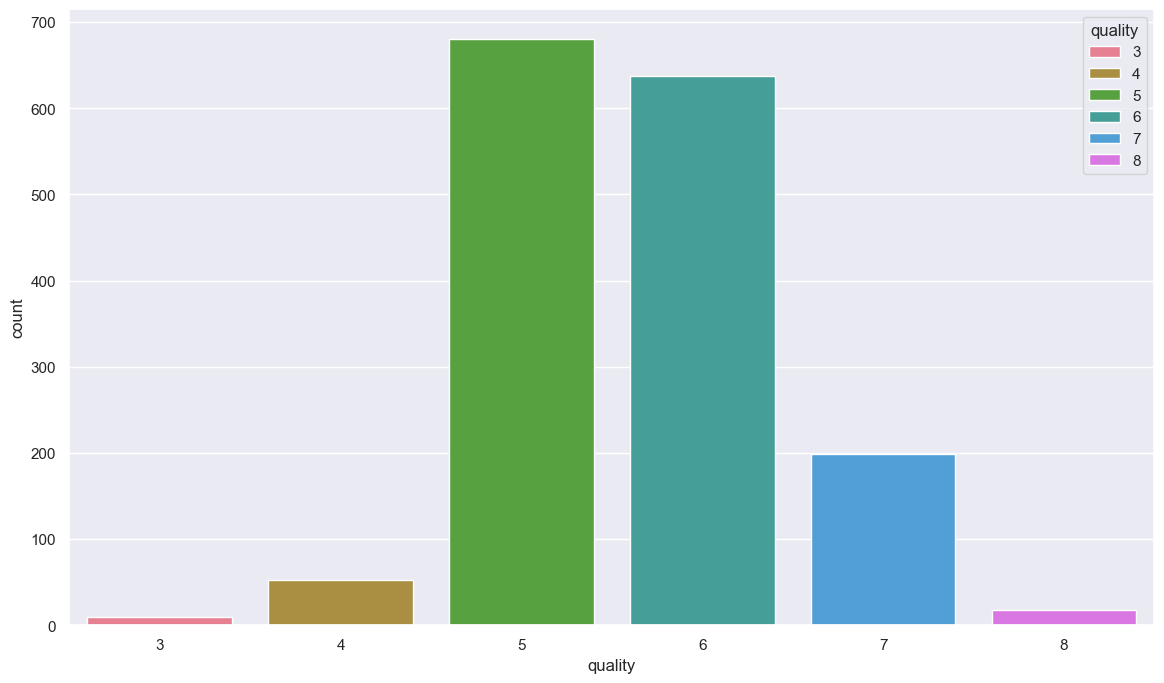

In [14]:
sns.set(rc={'figure.figsize': (14, 8)})
palette = sns.color_palette("husl", len(df_red['quality'].unique()))
sns.countplot(x='quality', hue='quality', data=df_red, palette=palette, dodge=False)


<Axes: >

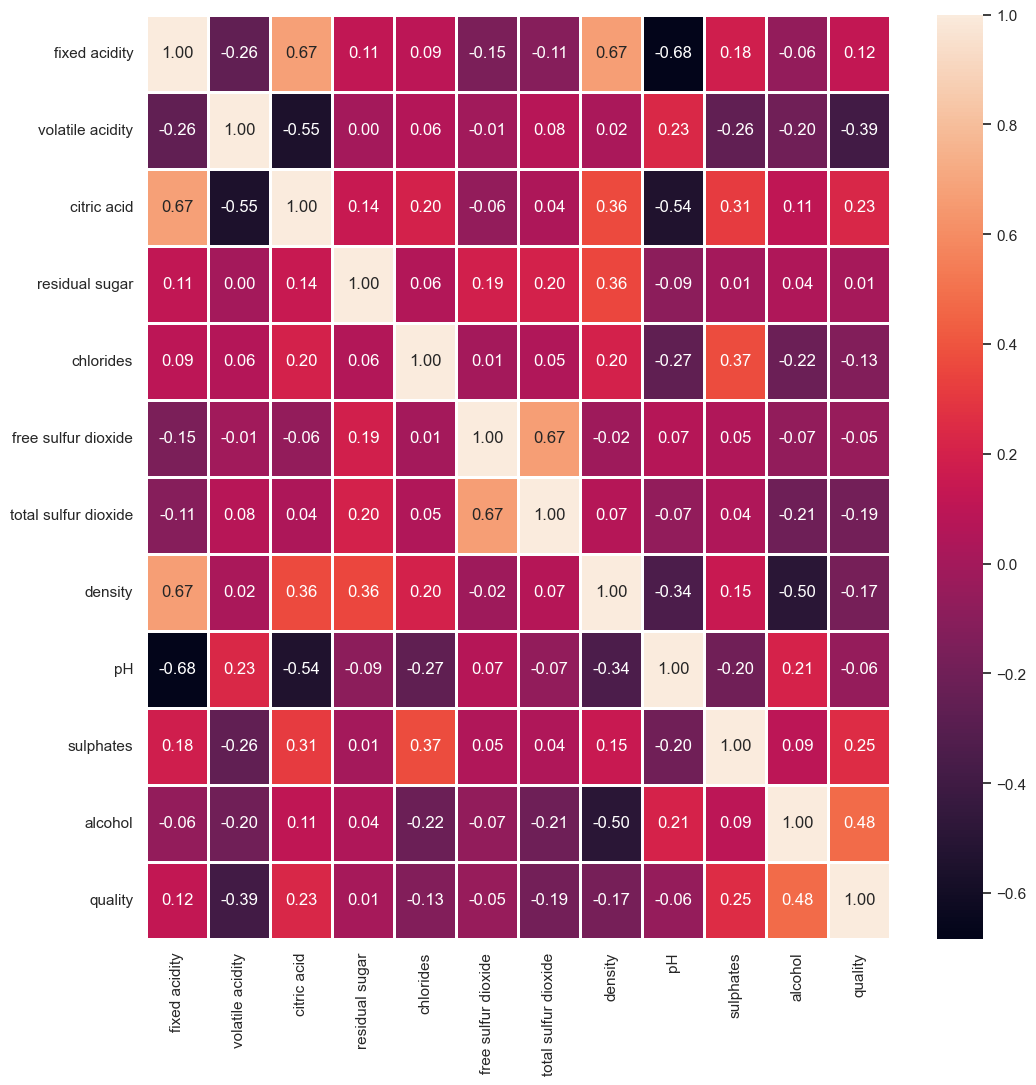

In [30]:
sns.heatmap(df_red.corr(), annot=True, fmt='.2f', linewidths=2)

- A coluna de qualidade tem correlação positiva com álcool, sulfatos, açúcar residual, ácido cítrico e acidez fixa
- O álcool está positivamente correlacionado com a qualidade do vinho tinto.
- O álcool tem uma correlação positiva fraca com o valor do pH.
- O ácido cítrico e a densidade têm uma forte correlação positiva com a acidez fixa.
- O pH tem correlação negativa com densidade, acidez fixa, ácido cítrico e sulfatos.

Uma coluna tem uma correlação positiva perfeita consigo mesma. Por exemplo, a qualidade do vinho tem uma correlação positiva consigo mesma. Esta é a razão pela qual todos os elementos diagonais têm uma correlação positiva de 1.

- *como a concentração de álcool é distribuída em relação à qualidade do vinho tinto?*

<Axes: xlabel='alcohol', ylabel='Count'>

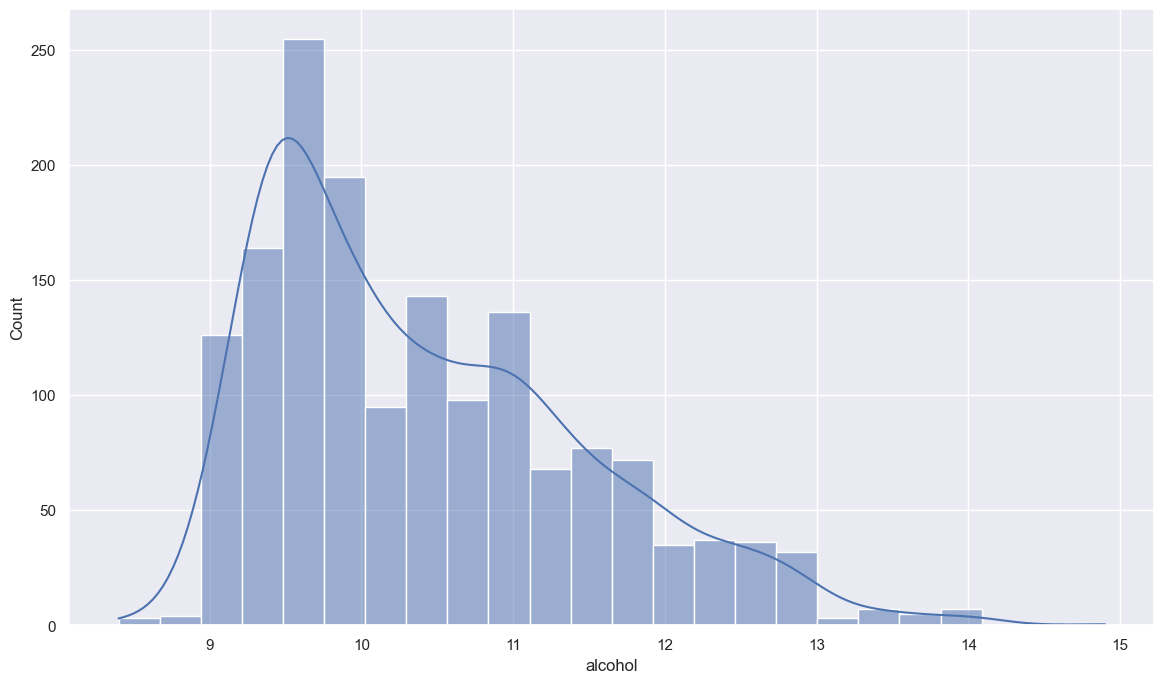

In [20]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.histplot(df_red['alcohol'], kde=True)

In [24]:
skew(df_red['alcohol'])

np.float64(0.8600210646566755)

<Axes: xlabel='quality', ylabel='alcohol'>

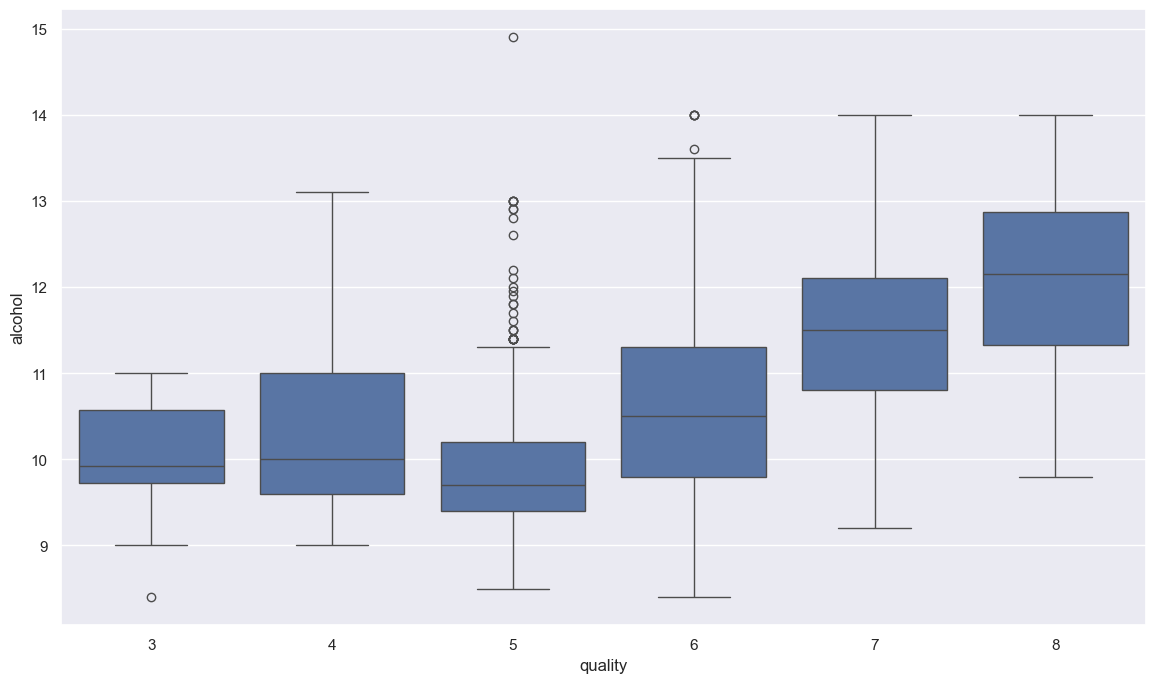

In [25]:
sns.boxplot(x='quality', y='alcohol', data = df_red)

<Axes: xlabel='quality', ylabel='alcohol'>

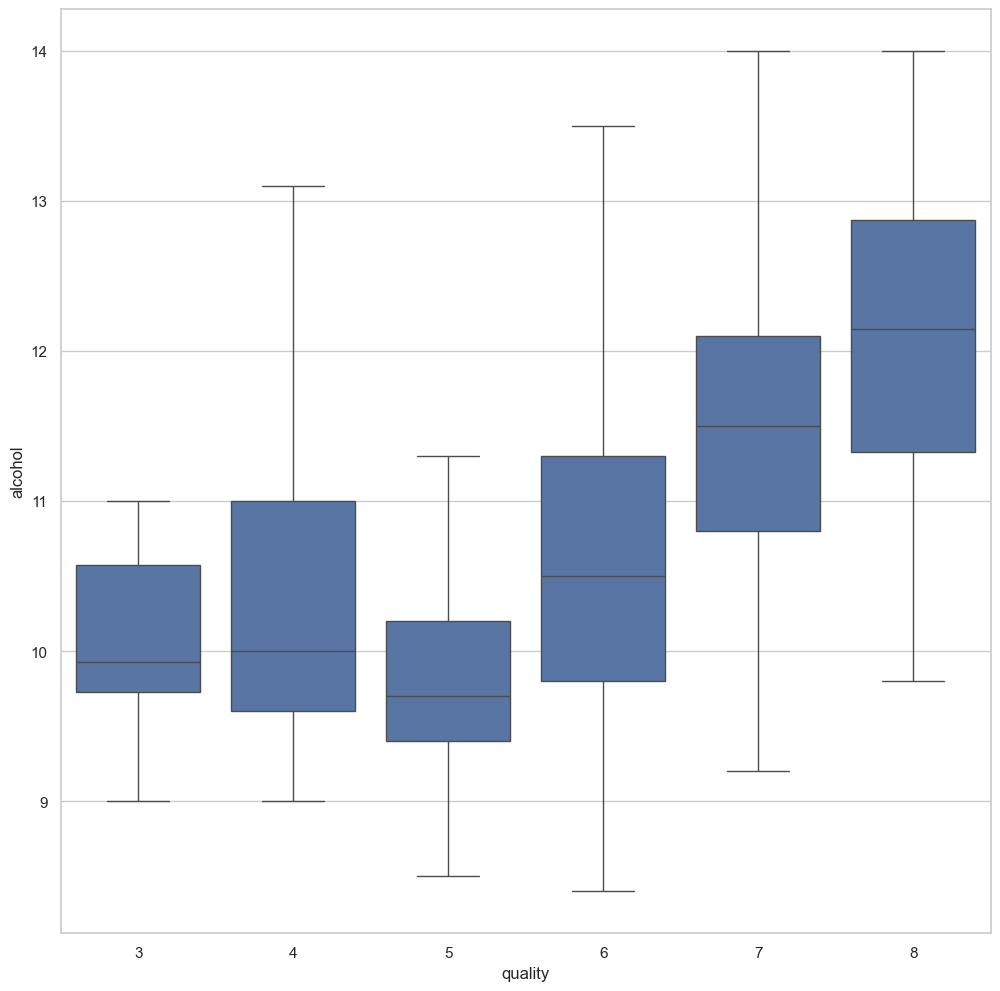

In [31]:
sns.boxplot(x='quality', y='alcohol', data = df_red, showfliers=False)

- à medida que a qualidade do vinho aumenta, também aumenta a concentração de álcool.

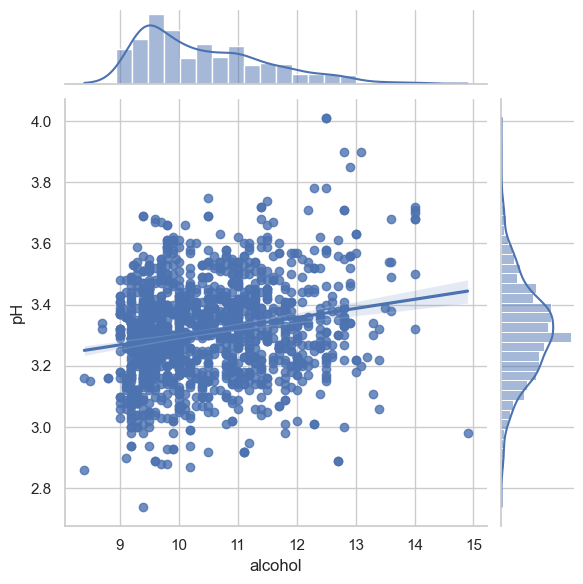

In [32]:
sns.jointplot(x='alcohol',y='pH',data=df_red, kind='reg')

- o álcool está fracamente relacionado positivamente aos valores de pH. 

#### Usando a regressão de Pearson para quantificar a correlação

In [37]:
def get_correlation(column1, column2, df):
  pearson_corr, p_value = pearsonr(df[column1], df[column2])
  print("Correlation entre {} e {} é {}".format(column1, column2, pearson_corr))
  print("P-value desta  correlation é {}".format(p_value))

In [38]:
get_correlation('alcohol','pH', df_red)

Correlation entre alcohol e pH é 0.20563250850549838
P-value desta  correlation é 9.964497741457687e-17


## Analisando o Vinho Branco

In [39]:
df_white.describe(

SyntaxError: incomplete input (2415119376.py, line 1)